# <Center>**ASSESSING AND MODELING MATHEMATICS LEARNING IN HIGHER EDUCATION**</center>

*Data citation:* B. Flamia Azevedo, M. Pacheco, F. P. Fernandes, and A. Pereira. "Dataset for Assessing Mathematics Learning in Higher Education," UCI Machine Learning Repository, 2024. [Online]. Available: https://doi.org/10.34620/dadosipb/PW3OWY.

## <center>**Data Analysis and Visualization**</center>

### **Setup**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### **Inspection and Descriptive Statistics**

In [2]:
# identify the encoding system used for the data
import chardet

with open('MathE_dataset.csv', 'rb') as rawdata:
    print(
        chardet.detect(rawdata.read(100000))
    )

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('MathE_dataset.csv', delimiter=';', encoding='latin1')
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [4]:
df.shape

(9546, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [6]:
# df['Subtopic'].value_counts()

In [7]:
# categorical_cols = ['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Keywords']

# for col in categorical_cols:
#     # print('\n',df[col].value_counts())
#     plt.figure(figsize=(10,6))
#     if col == 'Keywords' or col == 'Subtopic': continue
#     sns.countplot(df, x=col, hue='Type of Answer')
#     plt.title(col)
#     plt.show()

In [8]:
ans_by_ques_lvl = df[['Question Level', 'Type of Answer']].value_counts().reset_index(name='count')
ans_by_ques_lvl

,Question Level,Type of Answer,count
0,Basic,0,4227
1,Basic,1,3617
2,Advanced,1,853
3,Advanced,0,849


### **Visualize the Distributions**

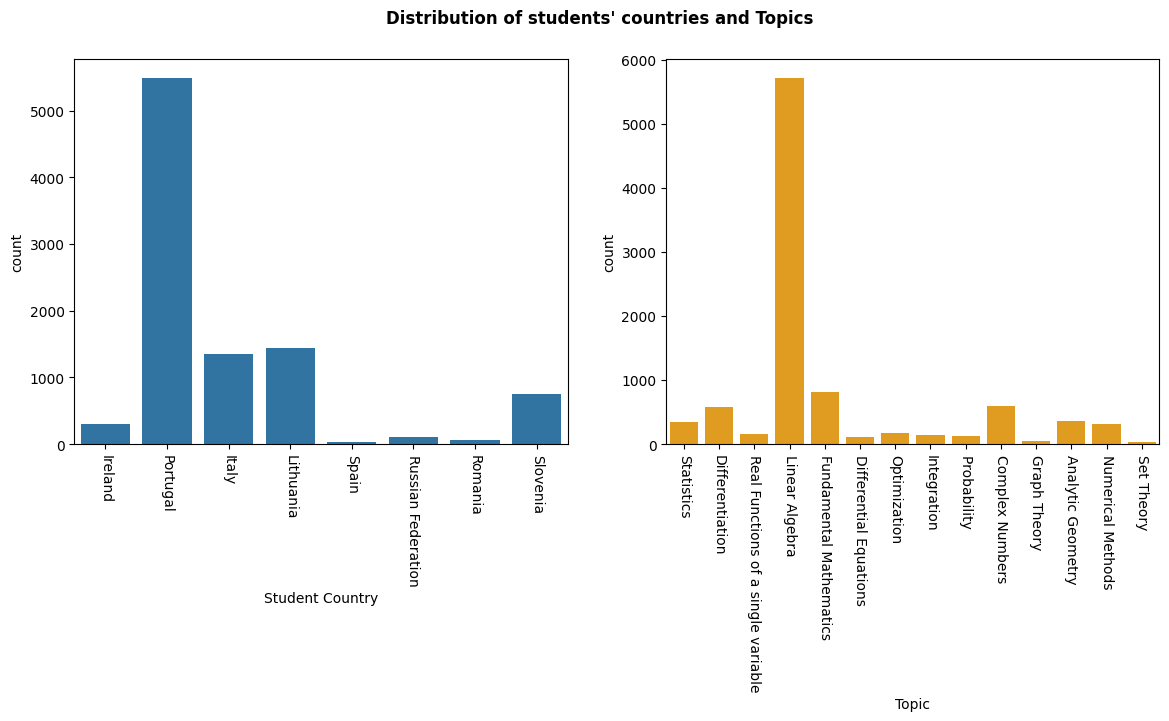

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Student Country', ax=axs[0])
axs[0].tick_params(axis = 'x', rotation=-90)

sns.countplot(data=df, x='Topic', ax=axs[1], color='orange')
axs[1].tick_params(axis = 'x', rotation=-90)
# sns.countplot(data=df, x='Question Level', ax=axs[1])

fig.suptitle('Distribution of students\' countries and Topics', fontweight='bold')
plt.show()

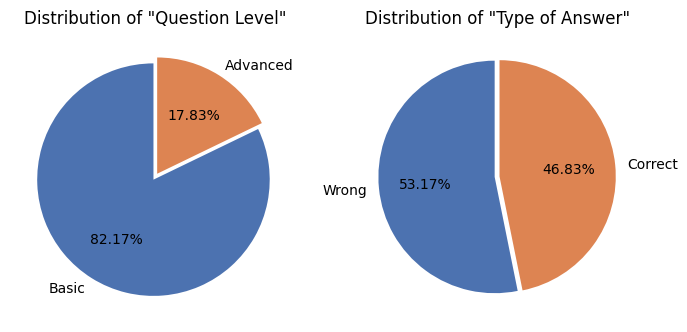

In [10]:
c = sns.color_palette("deep")

# Count values for each category
ques_level_count = df['Question Level'].value_counts()
answer_type_count = df['Type of Answer'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(7, 6))

# Define explode values
explode_ques_level_count = [0.03] * len(ques_level_count)
explode_ans_type_count = [0.021] * len(answer_type_count)

# Pie chart for 'Question Level'
axs[0].pie(ques_level_count, labels=ques_level_count.index, autopct='%1.2f%%', startangle=90, colors=c, explode=explode_ques_level_count)
axs[0].set_title('Distribution of \"Question Level\"')

# Pie chart for 'Type of Answer'
axs[1].pie(answer_type_count, labels=['Wrong', 'Correct'], autopct='%1.2f%%', startangle=90, colors=c, explode=explode_ans_type_count)
axs[1].set_title('Distribution of \"Type of Answer\"')

plt.tight_layout()
plt.show()


In [11]:
answer_type_count

Type of Answer
0    5076
1    4470
Name: count, dtype: int64

In [12]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')

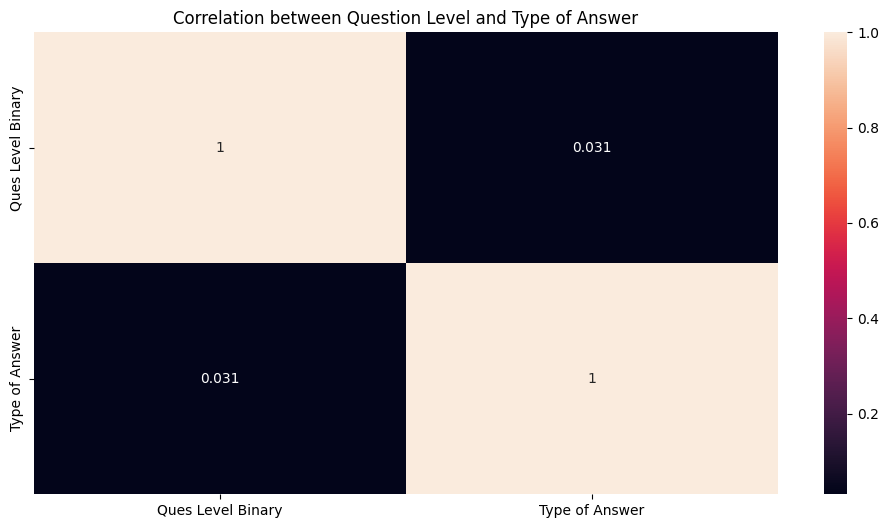

In [13]:
# Check the correlation between the question level and type of answer
plt.figure(figsize=(12, 6))

df['Ques Level Binary'] = df['Question Level'].apply(lambda x: 1 if x == 'Advanced' else 0)
sns.heatmap(
    df[['Ques Level Binary', 'Type of Answer']].corr(),
    annot=True,
)
plt.title('Correlation between Question Level and Type of Answer')
plt.show()

In [14]:
df_copy = df[['Student Country', 'Question Level', 'Topic', 'Subtopic']]
df_copy = pd.get_dummies(df_copy)
df_copy['Type of Answer'] = df['Type of Answer']
df_copy.head(1)

,Student Country_Ireland,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Advanced,Question Level_Basic,...,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces,Type of Answer
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0


In [15]:
corr_matrix = df_copy.corr()
corr_with_ans = corr_matrix['Type of Answer'].sort_values(ascending=False)
corr_with_ans

Type of Answer                                                 1.000000
Student Country_Slovenia                                       0.128712
Topic_Linear Algebra                                           0.053883
Subtopic_Elementary Geometry                                   0.044444
Subtopic_Linear Systems                                        0.040261
Subtopic_Linear Transformations                                0.037843
Question Level_Advanced                                        0.030727
Subtopic_Eigenvalues and Eigenvectors                          0.023776
Topic_Set Theory                                               0.023260
Subtopic_Set Theory                                            0.023260
Subtopic_Definite Integrals                                    0.021074
Student Country_Romania                                        0.018341
Topic_Graph Theory                                             0.017324
Subtopic_Graph Theory                                          0

In [16]:
from scipy.stats import pointbiserialr

# Calculate point biserial correlation for each country with respect to the target
countries = df['Student Country'].unique()
country_correlations = {}

for country in countries:
    country_series = df['Student Country'] == country
    correlation, p_value = pointbiserialr(country_series, df['Type of Answer'])
    country_correlations[country] = correlation

# Display correlations
print(country_correlations)


{'Ireland': np.float64(-0.0029813689913518763), 'Portugal': np.float64(-0.03359114786714607), 'Italy': np.float64(-0.017967028246775988), 'Lithuania': np.float64(-0.027368187065092663), 'Spain': np.float64(-0.0043138702337763), 'Russian Federation': np.float64(-0.02613040846546922), 'Romania': np.float64(0.018340854180628783), 'Slovenia': np.float64(0.12871200188602408)}


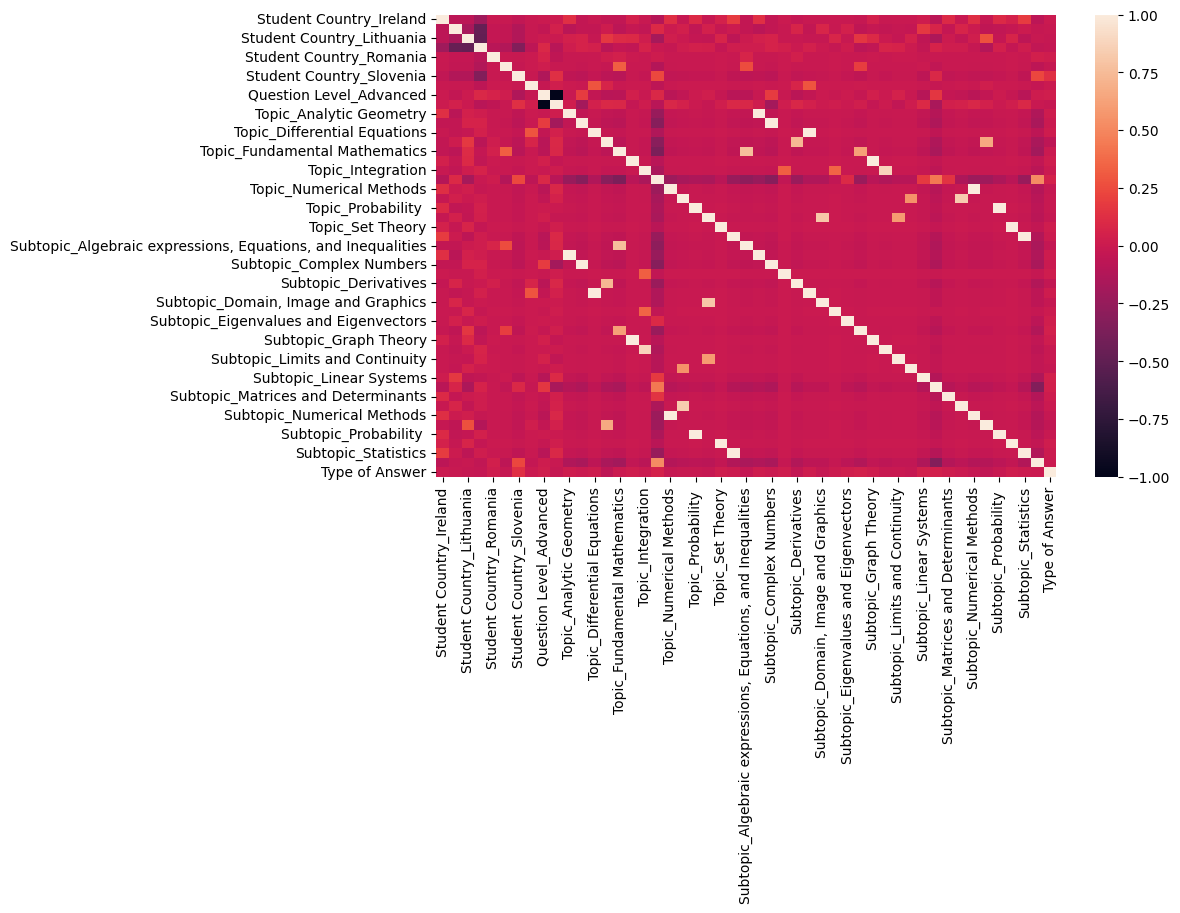

In [17]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    df_copy.corr(),
)
plt.show()

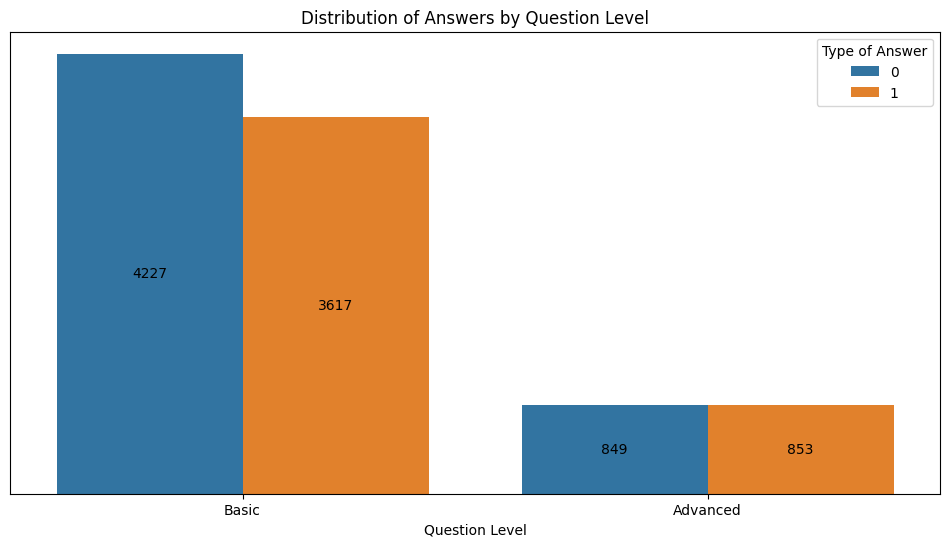

In [ ]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(12, 6))
ax = sns.countplot(df, x='Question Level', hue='Type of Answer')
ax.yaxis.set_visible(False)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d')

plt.title('Distribution of Answers by Question Level')
plt.show()

In [ ]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords', 'Ques Level Binary'],
      dtype='object')

In [ ]:
# Get the distribution of categorical features
country_ans_proportion = df.groupby(['Student Country', 'Type of Answer'])['Type of Answer'].value_counts().reset_index(name='Count')
topic_ans_proportion = df.groupby(['Topic', 'Type of Answer'])['Type of Answer'].value_counts().reset_index(name='Count')

Text(0.5, 0.98, 'Distribution of answers by country and topic')

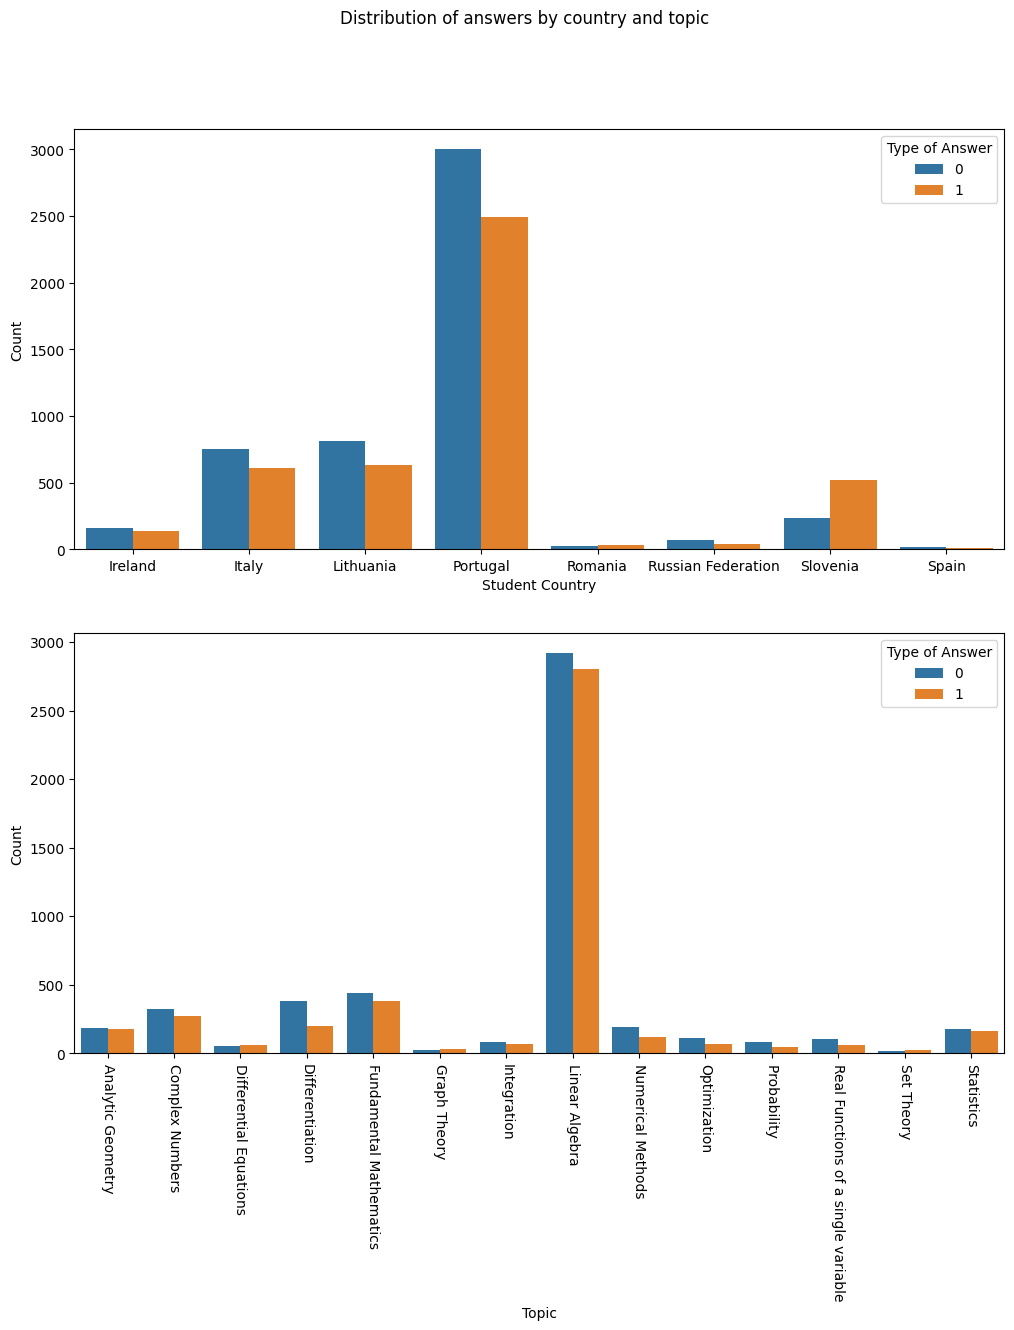

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

sns.barplot(country_ans_proportion, x='Student Country', y='Count', hue='Type of Answer', ax=axs[0])
sns.barplot(topic_ans_proportion, x='Topic', y='Count', hue='Type of Answer', ax=axs[1])

axs[1].tick_params(axis='x', rotation=-90)
plt.suptitle('Distribution of answers by country and topic')

### **Word Analysis**

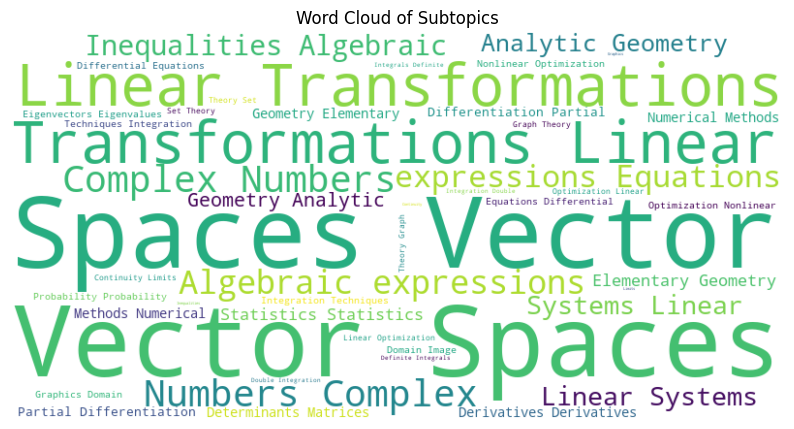

In [ ]:
# Combine all keywords into a single string
subtopic_text = ' '.join(df['Subtopic'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subtopic_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subtopics')
plt.show()


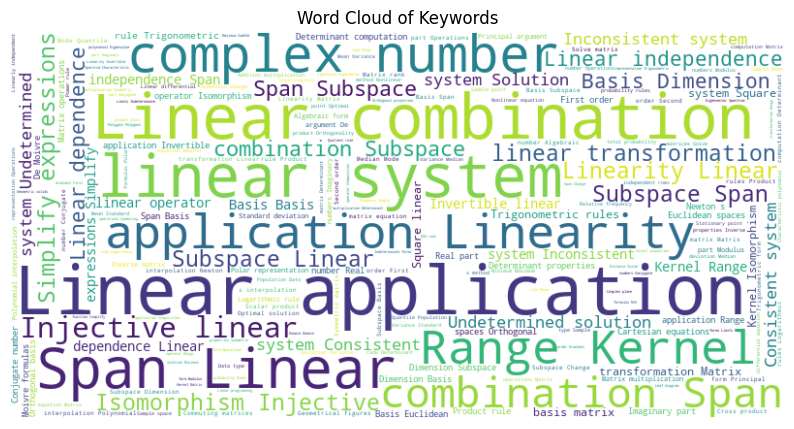

In [ ]:
# Combine all keywords into a single string
keywords_text = ' '.join(df['Keywords'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()


## <center>**ML Modeling**</center>

### **Setup**

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers, backend as K
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc

In [ ]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords', 'Ques Level Binary'],
      dtype='object')

### **Preprocessing and Data Splitting**

In [ ]:
target = 'Type of Answer'
features = ['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Question ID']

# define features and target data
y = df[target]
X = df[features]

In [ ]:
X.head()

,Student Country,Question Level,Topic,Subtopic,Question ID
0,Ireland,Basic,Statistics,Statistics,77
1,Portugal,Basic,Statistics,Statistics,77
2,Portugal,Basic,Statistics,Statistics,77
3,Italy,Basic,Statistics,Statistics,77
4,Portugal,Basic,Statistics,Statistics,77


In [ ]:
X = pd.get_dummies(X, drop_first=True)
X.shape

(9546, 45)

In [ ]:
X.head(1)

,Question ID,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Basic,Topic_Complex Numbers,...,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces
0,77,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Question ID,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Basic,Topic_Complex Numbers,...,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces
0,-1.61261,-0.407250,-0.421998,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
1,-1.61261,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
2,-1.61261,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
3,-1.61261,2.455495,-0.421998,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
4,-1.61261,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958


In [ ]:
# # encoding categorical variables and standardize all features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(drop='first'), features)
#     ], remainder='passthrough'
# )

# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('scaler', StandardScaler(with_mean=False))
# ])

# X_transformed = pipeline.fit_transform(X)
# X_transformed

In [ ]:
# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=0)

### **Build the Model**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor = 'loss',
    patience = 10,
    restore_best_weights = True
)

In [ ]:
len(y_train)

7636

### **Train and validate the Model Using k-fold Validation**

In [ ]:
k = 4
x_shape = X_train.shape
num_val_samples = x_shape[0] // k
num_epochs = 100
batch = 16
all_scores = []

# shuffle the data
X_train, y_train = shuffle(X_train, y_train)

for i in range(k):
    print(f"Processing fold {i}")
    # set aside validation data for ith fold
    val_input = X_train[i * num_val_samples: (i+1) * num_val_samples]
    val_target = y_train[i * num_val_samples: (i+1) * num_val_samples]

    # actual training data
    partial_x_train = np.concatenate([
        X_train[: i * num_val_samples],
        X_train[(i+1) * num_val_samples:]
    ], axis=0)
    
    partial_y_train = np.concatenate([
        y_train[: i * num_val_samples],
        y_train[(i+1) * num_val_samples:]
    ], axis = 0)

    # fit the model
    model = build_model()
    model.fit(
        partial_x_train, partial_y_train,
        epochs = num_epochs, batch_size = batch, verbose = 0,
        callbacks = [early_stop]
    )
    
    # evaluate the model on the validation data set
    loss_val, acc_val = model.evaluate(val_input, val_target, verbose=0)
    all_scores.append(acc_val)

    # clear session
    K.clear_session()

Processing fold 0

Processing fold 1
Processing fold 2
Processing fold 3


In [ ]:
np.mean(all_scores)

0.5741225779056549

### **Sklearn Models**

In [ ]:
X_scaled.head()

,Question ID,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Basic,Topic_Complex Numbers,...,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces
0,-1.61261,-0.407250,-0.421998,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
1,-1.61261,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
2,-1.61261,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
3,-1.61261,2.455495,-0.421998,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
4,-1.61261,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,...,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958


In [ ]:
# # Define models to fit
# models = {
#     "logistic regression": LogisticRegression(),
#     "decision tree classifier": DecisionTreeClassifier(),
#     "random forest classifier": RandomForestClassifier(),
#     "gradient boosting classifier": GradientBoostingClassifier()
# }

# # K-Fold setup
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Initialize results dictionary to store metrics
# results = {name: {'f1 scores': [], 'roc_auc scores': []} for name in models}

# # Convert DataFrames to numpy arrays for compatibility with KFold indexing
# X_train_np = X_train.to_numpy()
# y_train_np = y_train.to_numpy()

# # K-Fold Cross-Validation loop
# for model_name, model in models.items():
#     for train_index, val_index in kf.split(X_train_np):
#         X_ktrain, X_kval = X_train_np[train_index], X_train_np[val_index]
#         y_ktrain, y_kval = y_train_np[train_index], y_train_np[val_index]

#         # Fit the model
#         model.fit(X_ktrain, y_ktrain)

#         # Predict and evaluate
#         y_pred = model.predict(X_kval)
#         y_proba = model.predict_proba(X_kval)[:, 1] if hasattr(model, "predict_proba") else None

#         # Compute metrics
#         f1 = f1_score(y_kval, y_pred)
#         roc_auc = roc_auc_score(y_kval, y_proba) if y_proba is not None else None

#         # Append scores
#         results[model_name]['f1 scores'].append(f1)
#         if roc_auc is not None:
#             results[model_name]['roc_auc scores'].append(roc_auc)

#     # Compute and print average metrics
#     avg_f1 = np.mean(results[model_name]["f1 scores"])
#     avg_roc_auc = np.mean(results[model_name]["roc_auc scores"]) if results[model_name]["roc_auc scores"] else None

#     print(f"Model: {model_name}")
#     print(f"Average F1-Score: {avg_f1:.4f}")
#     print(f"Average ROC-AUC: {avg_roc_auc:.4f}" if avg_roc_auc is not None else "ROC-AUC not available")
#     print("-" * 30)
#     print("\n")


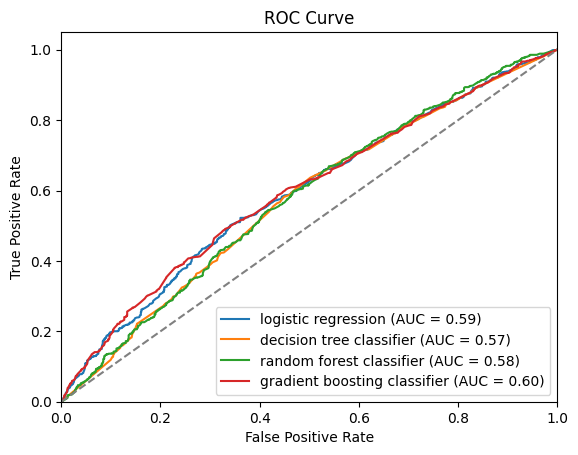

In [ ]:
# Define models to fit
models = {
    "logistic regression": LogisticRegression(),
    "decision tree classifier": DecisionTreeClassifier(),
    "random forest classifier": RandomForestClassifier(),
    "gradient boosting classifier": GradientBoostingClassifier()
}

results = {name: {'f1 scores': [], 'roc_auc scores': []} for name in models}

for model_name, model in models.items():
    # fit the model
    model.fit(X_train, y_train)

    # predict the target on the test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # evaluate the models' performance
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Append scores
    results[model_name]['f1 scores'].append(f1)
    if roc_auc is not None:
        results[model_name]['roc_auc scores'].append(auroc)

    if y_proba is not None:
        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        
        # Calculate the AUC
        roc_auc = auc(fpr, tpr)

    # print(f"Model: {model_name}")
    # print(f"F1-Score: {f1:.4f}")
    # print(f"ROC-AUC: {auroc:.4f}" if auroc is not None else "ROC-AUC not available")
    # print("\n")

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
# Plot formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
# print("-" * 30)

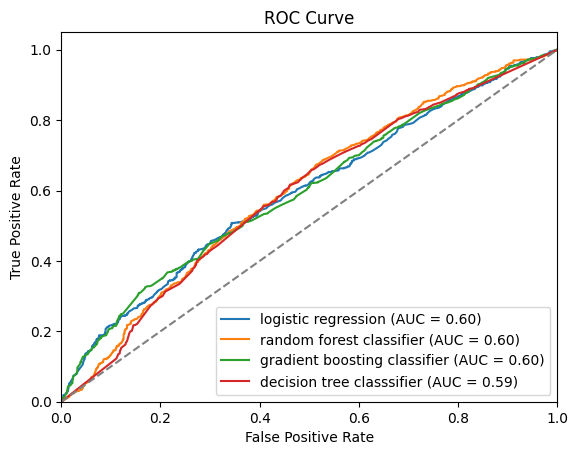

In [ ]:
models = {
    'logistic regression': LogisticRegression(),
    'random forest classifier': RandomForestClassifier(),
    'gradient boosting classifier': GradientBoostingClassifier(),
    'decision tree classsifier': DecisionTreeClassifier()
}

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
results = {name: {'f1 scores': [], 'roc_auc scores': []} for name in models}
X_np = X_scaled.to_numpy()

for model_name, model in models.items():
    fpr_list, tpr_list, roc_auc_list = [], [], []
    for train_idx, test_idx in kf.split(X_np):
        # for kth fold, split the data into training and test data
        X_ktrain, X_ktest = X_np[train_idx], X_np[test_idx]
        y_ktrain, y_ktest = y[train_idx], y[test_idx]

        # Fit the model
        model.fit(X_ktrain, y_ktrain)

        # predictions on the test data
        y_pred = model.predict(X_ktest)
        y_proba = model.predict_proba(X_ktest)[:,1] if hasattr(model, 'predict_proba') else None

        # evaluate the model's performance
        f1 = f1_score(y_ktest, y_pred)
        results[model_name]['f1 scores'].append(f1)

        if y_proba is not None:
            roc_score = roc_auc_score(y_ktest, y_proba) if y_proba is not None else None
            results[model_name]['roc_auc scores'].append(roc_score)
            fpr, tpr, thresholds = roc_curve(y_ktest, y_proba)
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            roc_auc = auc(fpr, tpr)
            roc_auc_list.append(roc_auc)
        else: None

    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
    avg_roc_auc = np.mean(roc_auc_list)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
# Plot formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
    